<div class='alert alert-info alert-block' align='center'>
    <h1>Credit Card Fraud Detection</h1>
</div>

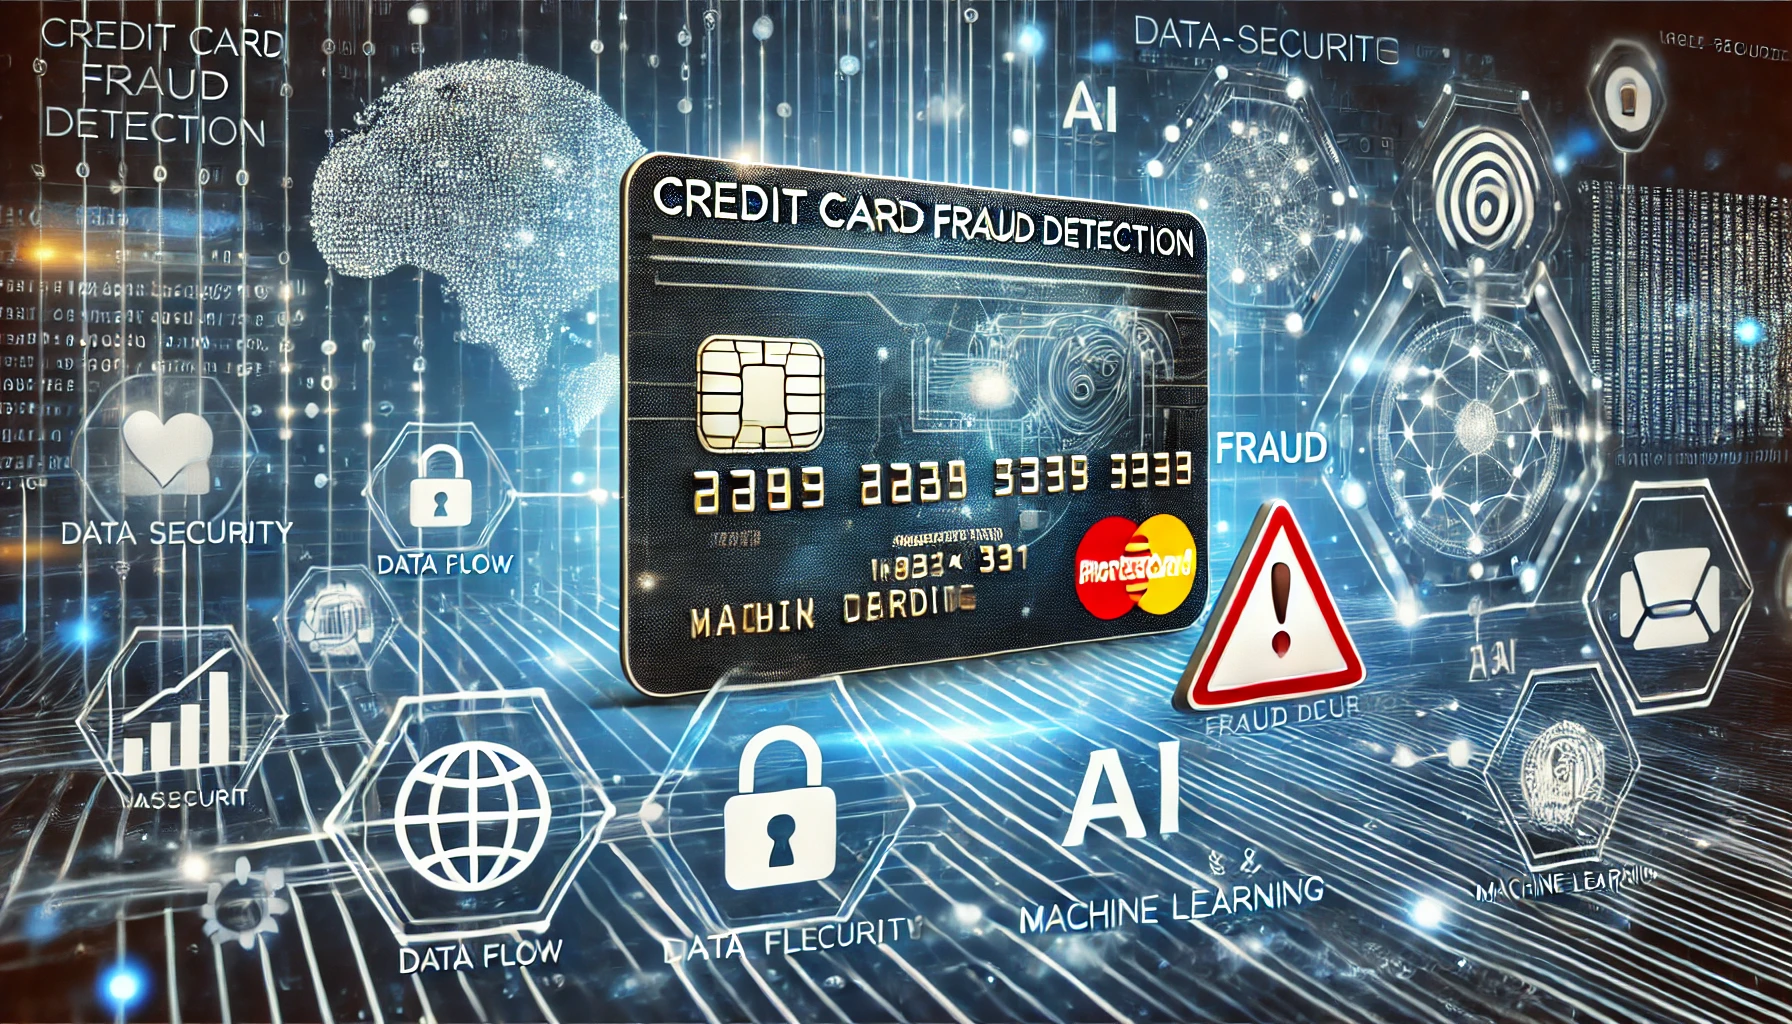

In [ ]:
Image(r"cc_fraud_detect.png")

<div class='alert alert-info alert-block' align='center'><h2>Content</h2></div>

- Problem Statement
- Introduction
- Load packages
- Read the data
- Check the data
    - Glimpse the data
    - Check missing data
    - Check data unbalance
- Data exploration
- Data Scaling
- Predictive models
    - RandomForrestClassifier
    - AdaBoostClassifier
    - XGBoost Classifier
    - LightGBM
    - ANN
- Conclusions
- References

<div class=' alert alert-info alert-block' align=center><h2>Problem Statement:</h2></div>
Credit cards are widely used for online purchases and payments. While they offer convenience, they also pose risks, particularly in the form of credit card fraud—where an unauthorized person uses someone else's credit card or card information to make purchases or withdraw cash.

It is crucial for credit card companies to detect fraudulent transactions effectively to prevent customers from being charged for unauthorized purchases.

The dataset contains credit card transactions made by European cardholders in September 2013. It includes transactions recorded over two days, with 492 fraudulent transactions out of 284,807 total transactions. This makes the dataset highly imbalanced, with fraudulent transactions accounting for only 0.172% of all transactions.

Our objective is to build a classification model that can accurately predict whether a given transaction is fraudulent or not.



<div class=' alert alert-info alert-block' align=center><h2>Introduction</h2></div>
The dataset consists of credit card transactions from September 2013 by European cardholders. It covers a two-day period, containing 284,807 transactions, out of which 492 are fraudulent (0.172%), making it highly imbalanced.

All input features in the dataset are numerical, as they have undergone Principal Component Analysis (PCA) for confidentiality purposes.

- V1, V2, ..., V28 represent the principal components obtained via PCA.
- The features Time and Amount were not transformed using PCA:
    - Time: Represents the seconds elapsed since the first transaction in the dataset.
    - Amount: Represents the transaction amount, which can be useful for cost-sensitive learning.

The target variable Class takes the value 1 for fraudulent transactions and 0 for non-fraudulent transactions.
wise.

<div class='alert alert-info alert-block' align='center'>
    <h3>Importing Libraries</h3>
</div>

In [430]:
# importing basic libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# importing scikit learn libraries for model training, prediction
from sklearn.model_selection import train_test_split , RandomizedSearchCV , KFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, classification_report,confusion_matrix,ConfusionMatrixDisplay, recall_score, \
f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import XGBClassifier

# importing library to handle unbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE , RandomOverSampler

# importing deep learning libraries for model training and prediction
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout
from keras import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

# importing library for image
from IPython.display import Image

# importing library to save models
import pickle

pd.options.display.max_columns=None

import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset

In [210]:
# loading the credit card data
df = pd.read_csv(r"creditcard.csv")

In [211]:
# top 5 rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [212]:
# rows and the columns in data
print('Rows in dataset :',df.shape[0])
print('Columns in dataset :',df.shape[1])

Rows in dataset : 284807
Columns in dataset : 31


In [213]:
# columns name 
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [218]:
# inforamtion of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [220]:
# checking for the null records
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [222]:
# checking for the duplicated records present in the data
df.duplicated().sum()

1081

In [223]:
# droping duplicated records from the data
df.drop_duplicates(inplace=True)

In [224]:
# rows and columns of the data after dropping duplicated records

print('Rows in dataset :',df.shape[0])
print('Columns in dataset :',df.shape[1])

Rows in dataset : 283726
Columns in dataset : 31


<div class='alert alert-info alert-block' align='center'>
    <h2>Exploratory data analysis</h2>
</div>

In [229]:
# statistcal information of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


#### Correlation Heatmap

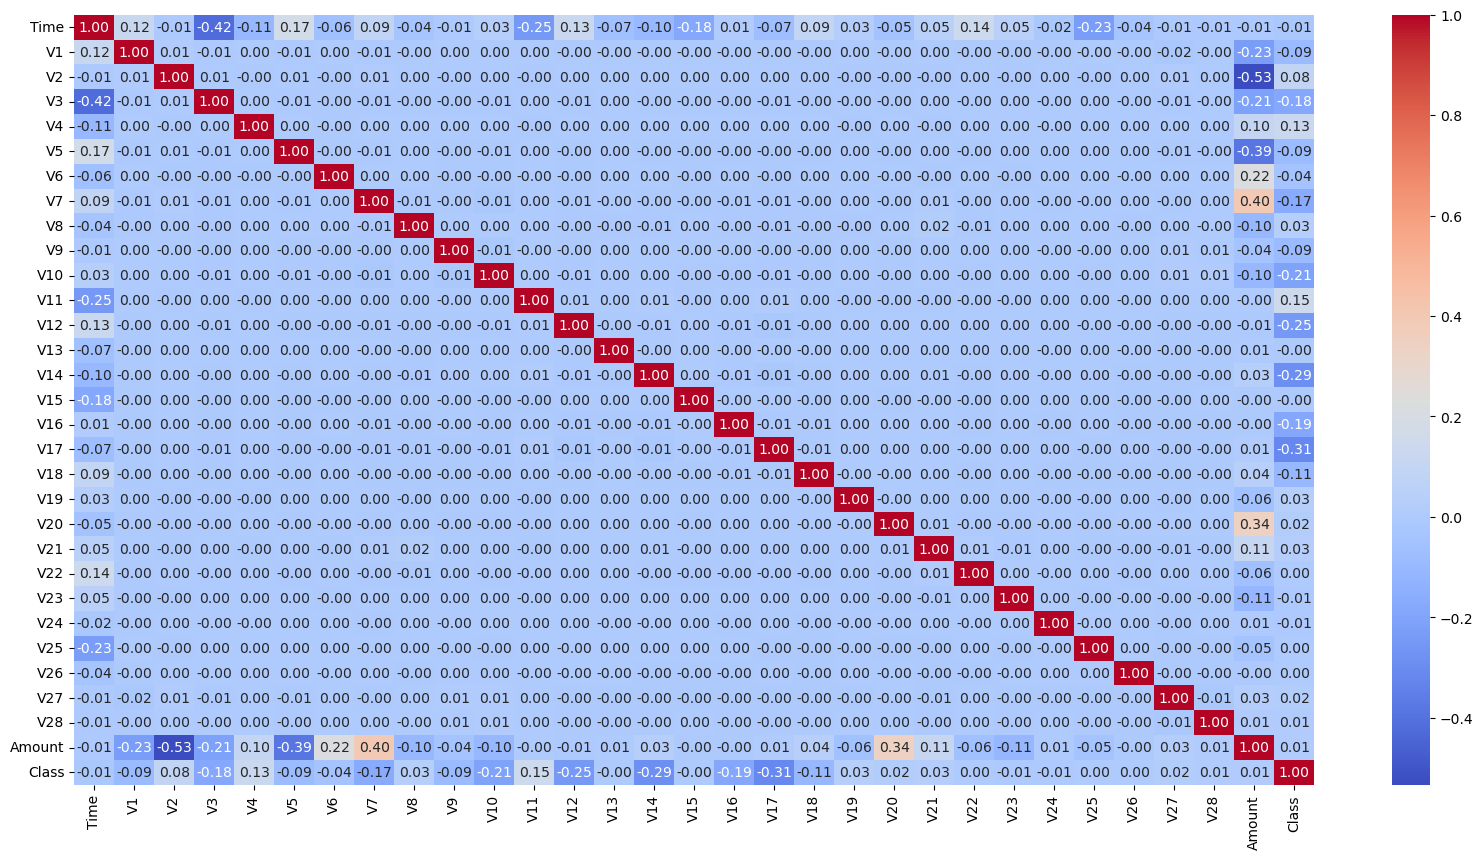

In [232]:
# ploting heatmap of correaltion of colunms
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

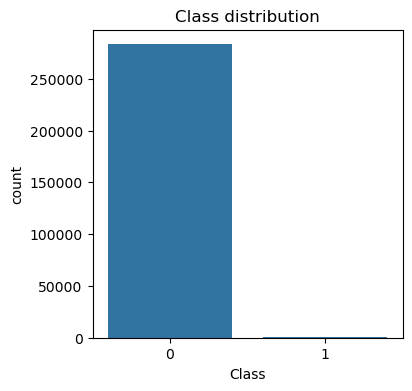

In [234]:
# calculating the percentage of the classes in target column
value_count = df['Class'].value_counts()

# plotting the bar plot of Class distribution
plt.figure(figsize=(4,4))
sns.barplot(x=value_count.index,y=value_count)
plt.title('Class distribution')
plt.show()

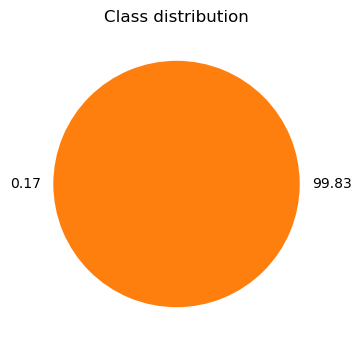

In [236]:
# calculating the percentage of the classes in target column
pct = df['Class'].value_counts(normalize=True)*100

# plotting the pie chart of Class distribution
fig,ax = plt.subplots(figsize=(4,4))
ax.pie(x=pct.keys(),labels=pct.values.round(2))
plt.title('Class distribution')
plt.show()

##### The dataset is highly imbalanced, with fraudulent transactions accounting for only 0.17% of the total data. This imbalance poses a challenge for model training, as standard machine learning models may be biased toward the majority class (non-fraudulent transactions). To address this, techniques such as oversampling, undersampling, or advanced methods like SMOTE will be using to improve model performance and ensure better fraud detection.

In [239]:
df.Time.describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

In [241]:
# Convert Time column from seconds to hours
df['Hour'] = df['Time'] // 3600 

# Display first few rows
print("First 5 rows")
print(df[['Time', 'Hour']].head())

# Display last few rows
print("Last 5 rows")
print(df[['Time', 'Hour']].tail())

First 5 rows
   Time  Hour
0   0.0   0.0
1   0.0   0.0
2   1.0   0.0
3   1.0   0.0
4   2.0   0.0
Last 5 rows
            Time  Hour
284802  172786.0  47.0
284803  172787.0  47.0
284804  172788.0  47.0
284805  172788.0  47.0
284806  172792.0  47.0


In [243]:
# creating separate dataframe for valid and fraud transactions
valid = df[df['Class']==0]
fraud = df[df['Class']==1]

In [245]:
# amount details for Fraudulent Transaction

fraud['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [247]:
# amount details for Non Fraudulent Transaction

valid['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

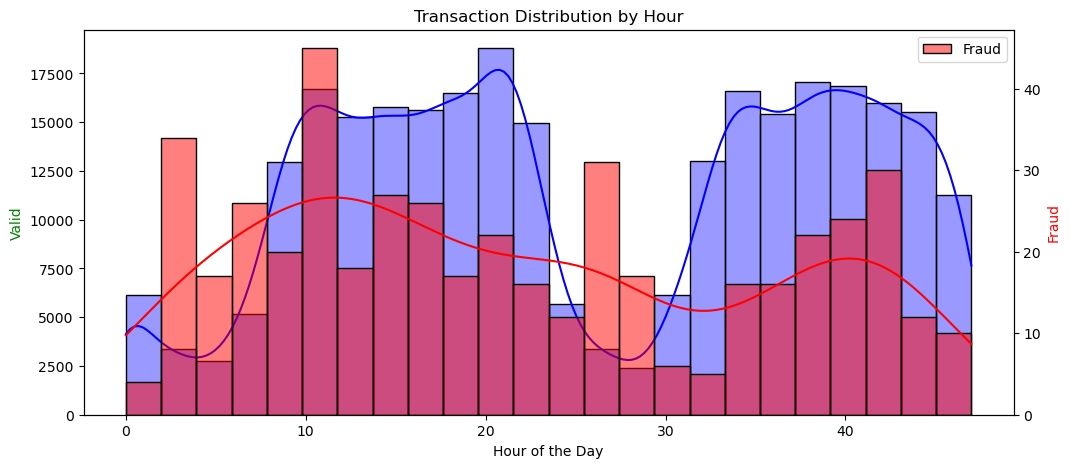

In [249]:
# Plot fraud and non-fraud transactions by hour
plt.figure(figsize=(12,5))

ax1 = plt.gca()
ax2 = ax1.twinx()

sns.histplot(valid['Hour'], bins=24, color='blue', label='Non-Fraud', kde=True,ax=ax1,alpha=0.4)
sns.histplot(fraud['Hour'], bins=24, color='red', label='Fraud', kde=True,ax=ax2)

ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel('Valid', color='green')
ax2.set_ylabel('Fraud', color='red')
plt.title("Transaction Distribution by Hour")
plt.legend()
plt.show()

##### Fraudulent transactions are more evenly distributed over time compared to valid transactions.

#### Transaction Summary by Hour: Fraud vs. Valid Transactions

In [255]:
# creating summary report of the data for the hour of the day for valid and fraud transactions
temp = df.groupby(['Hour','Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()

# converting above temp into dataframe
new_df = pd.DataFrame(temp)
# printing new dataframe
new_df

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.00,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1552,106983.39,68.932597,17.985,45434.509936
...,...,...,...,...,...,...,...,...,...
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6429,448494.71,69.761193,15.000,132855.109619
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4824,332456.59,68.917204,14.015,56434.557064


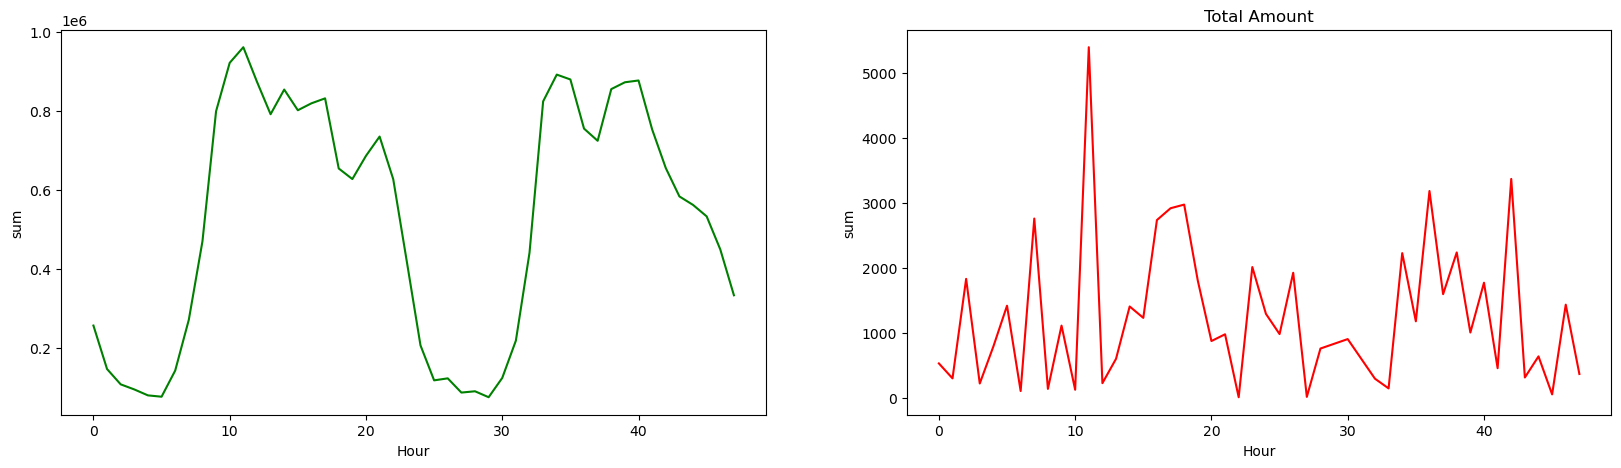

In [257]:
# amount of fraud and valid transaction at hour of day
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(20,5))

# plotting the lineplot for the fraud and valid transactions
s = sns.lineplot(ax = ax1 , x = 'Hour' , y='sum' , data = new_df.loc[new_df.Class==0],color='green')
plt.title('Total Amount')
s = sns.lineplot(ax = ax2 , x = 'Hour' , y='sum' , data = new_df.loc[new_df.Class==1],color='red')
plt.title('Total Amount')
plt.show()

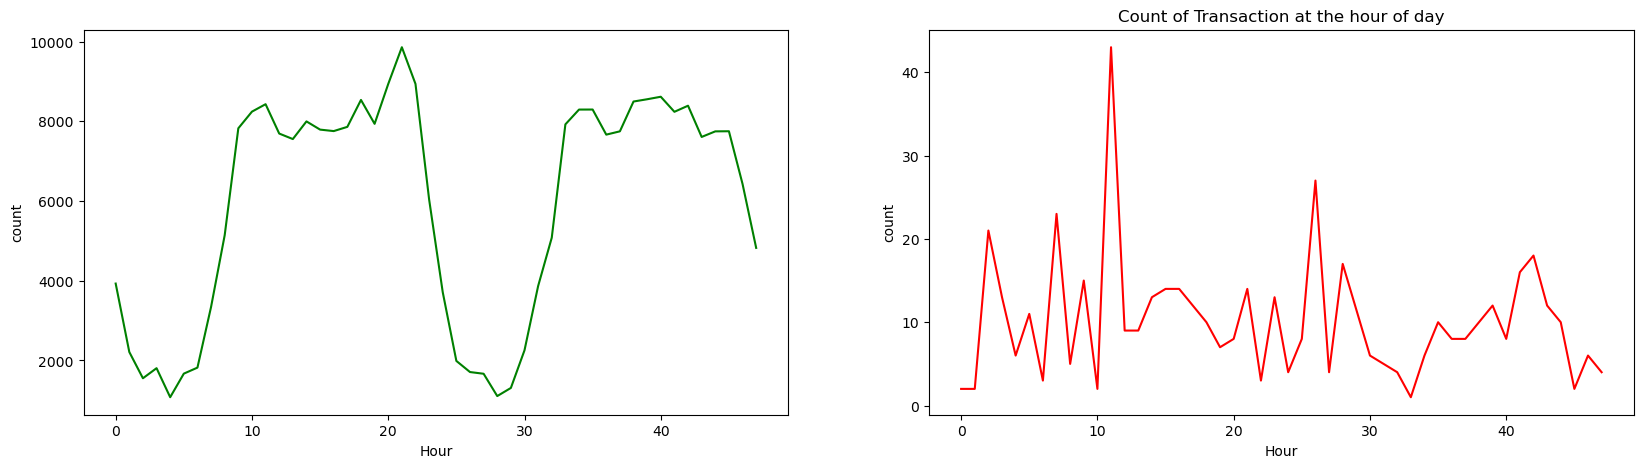

In [259]:
# count of fraud and valid transaction at hour of the day
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(20,5))

# plotting the line plot of the count of the transactions for fraud and valid transactions
s= sns.lineplot(ax = ax1 , x = 'Hour' , y='count' , data = new_df.loc[new_df.Class==0],color='green')
plt.title('Count of Transaction at the hour of day')
s = sns.lineplot(ax = ax2 , x = 'Hour' , y='count' , data = new_df.loc[new_df.Class==1],color='red')
plt.title('Count of Transaction at the hour of day')
plt.show()

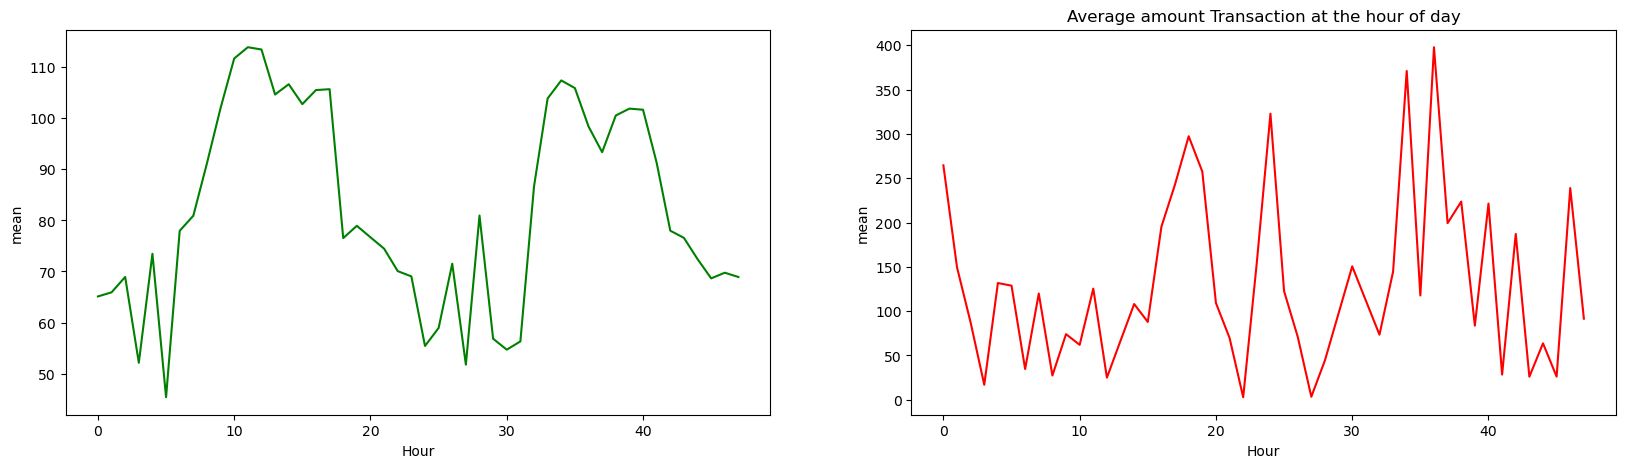

In [261]:
# count of fraud and valid transaction at hour of the day
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(20,5))

# plotting the mean of the Amount for valid and fraud transactions
s = sns.lineplot(ax = ax1 , x = 'Hour' , y='mean' , data = new_df.loc[new_df.Class==0],color='green')
plt.title('Average amount Transaction at the hour of day')
s = sns.lineplot(ax = ax2 , x = 'Hour' , y='mean' , data = new_df.loc[new_df.Class==1],color='red')
plt.title('Average amount Transaction at the hour of day')
plt.show()

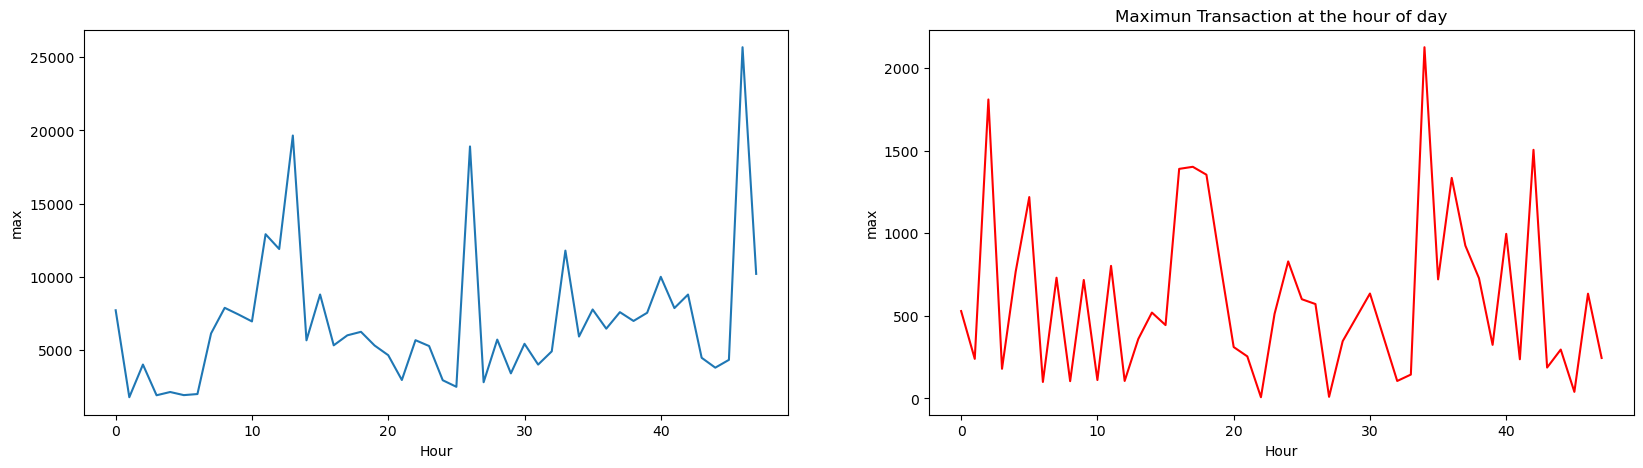

In [263]:
# count of fraud and valid transaction at hour of the day
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(20,5))

# plotting the maximum amount of transaction happen at hour of the day for valid and fraud transaction
s = sns.lineplot(ax = ax1 , x = 'Hour' , y='max' , data = new_df.loc[new_df.Class==0])
plt.title('Maximun Transaction at the hour of day')
s = sns.lineplot(ax = ax2 , x = 'Hour' , y='max' , data = new_df.loc[new_df.Class==1],color='red')
plt.title('Maximun Transaction at the hour of day')
plt.show()

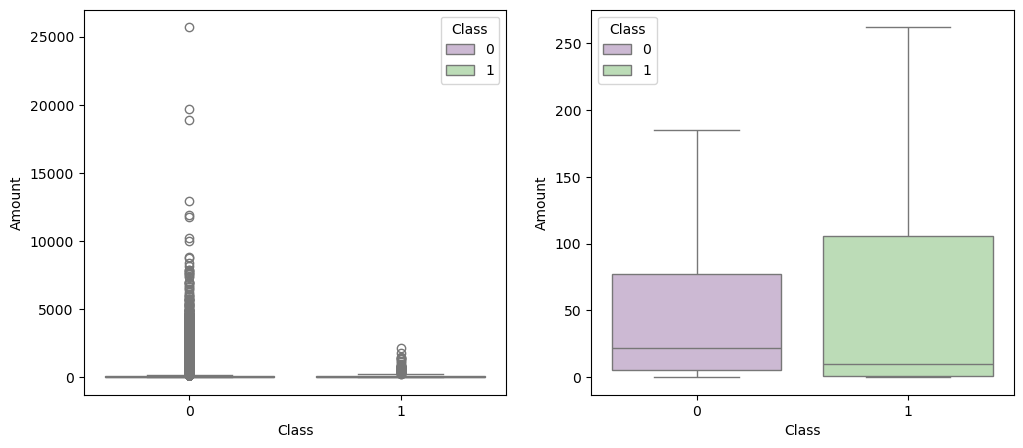

In [265]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

<div class='alert alert-info alert-block' align='center'>
    <h2>Data Preprocessing</h2>
</div>

In [269]:
# feature scaling  columns -> Time, Amount 
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df.drop(columns='Class'))

<div class='alert alert-info alert-block' align='center'>
    <h2>Model Building and Prediction</h2>
</div>

<div class='alert alert-info alert-block' align='center'>
    <h3>Under sampling data</h3>
</div>

In [273]:
# createing object for under sampling
under_sample = RandomUnderSampler(sampling_strategy=0.2,random_state=34)

# undersampling the majority class
X_undersampled, y_undersampled = under_sample.fit_resample(X_scaled , df['Class'])

In [275]:
# value count after under sampling
y_undersampled.value_counts()

Class
0    2365
1     473
Name: count, dtype: int64

In [277]:
# splitting the data for training and testing
X_train_us, X_test_us,  y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled,test_size=0.2,random_state=34)

# printing the shape of the train and test data
print('Shape of the Train data',X_train_us.shape)
print('Shape of the Test data', X_test_us.shape)

Shape of the Train data (2270, 31)
Shape of the Test data (568, 31)


In [279]:
# creating a dictionary of the models
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "XGBoost Classifier":XGBClassifier()
}
# creating a dataframe to keep the log of the performance of the models
score_card_us = pd.DataFrame(columns=['Model_Name','Accuracy_Score_train','Accuracy_Score_test','Precision_Score','Recall_Score','F1-Score'])

# runing loop to test the models
for name,model in models.items():
    # training and predicting the data
    model.fit(X_train_us,y_train_us)
    y_pred_us = model.predict(X_test_us)

    # checking the accuracy and perecision score for train and test data
    accuracy_train = accuracy_score(y_train_us,model.predict(X_train_us))
    accuracy_test = accuracy_score(y_test_us,y_pred_us)
    precision = precision_score(y_test_us, y_pred_us)
    recall = recall_score(y_test_us, y_pred_us)
    f1Score = f1_score(y_test_us , y_pred_us)

    # updating the performance of the models
    score_card_us = pd.concat([score_card_us,pd.DataFrame([[name,accuracy_train,accuracy_test,precision,recall,f1Score]],
                                                          columns=['Model_Name','Accuracy_Score_train','Accuracy_Score_test','Precision_Score',
                                                                   'Recall_Score','F1-Score'])],
                           ignore_index=True)

# printing the score card
score_card_us

,Model_Name,Accuracy_Score_train,Accuracy_Score_test,Precision_Score,Recall_Score,F1-Score
0,Random Forest,1.0,0.955986,0.987179,0.762376,0.860335
1,Decision Tree,1.0,0.948944,0.867347,0.841584,0.854271
2,XGBoost Classifier,1.0,0.961268,0.964706,0.811881,0.881720


In [281]:
# exporting score card table for undersampled data
score_card_us.to_csv("scorecard_undersample.csv",index=False)

In [283]:
# prediction on whole data

y_pred = model.predict(X_scaled)

print('accuracy_test =', accuracy_score(df['Class'],y_pred))
print('precision =', precision_score(df['Class'], y_pred))
print('recall =', recall_score(df['Class'], y_pred))
print('f1Score =', f1_score(df['Class'] , y_pred))
print('roc_auc_score =',roc_auc_score(df['Class'],y_pred))

accuracy_test = 0.9965882576852315
precision = 0.323592302209551
recall = 0.959830866807611
f1Score = 0.4840085287846482
roc_auc_score = 0.9782402525584128


#### Confusion Matrix

In [286]:
# confustion matrix
cm = confusion_matrix(df['Class'],y_pred)

print(cm)

[[282304    949]
 [    19    454]]


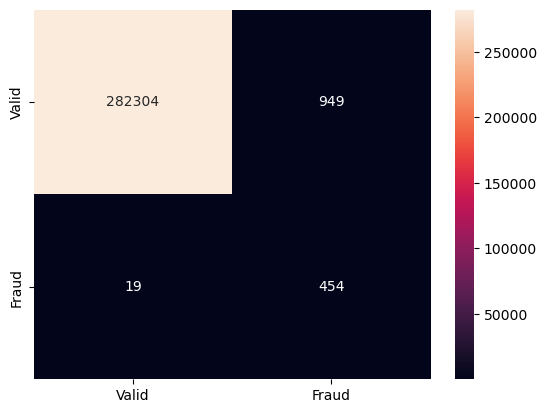

In [288]:
# printing the confusion matrix
Labels = ['Valid','Fraud']

sns.heatmap(cm,xticklabels=Labels , yticklabels=Labels , annot=True, fmt="d")

plt.show()

#### Roc Auc score

In [291]:
# roc auc score for

roc_auc_score(df['Class'],y_pred)

0.9782402525584128

<div class='alert alert-info alert-block' align='center'>
    <h3>Over sampling data</h3>
</div>

In [294]:
# creting object for over sampling
smote = SMOTE(sampling_strategy=0.5,random_state=34)

# resampling minority data to 50% of the majority data
X_oversampled , y_oversampled = smote.fit_resample(X_scaled,df['Class'])

In [295]:
# count of the target data after of oversampling
y_oversampled.value_counts()

Class
0    283253
1    141626
Name: count, dtype: int64

In [298]:
# RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
# NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
# NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


# #TRAIN/VALIDATION/TEST SPLIT
# #VALIDATION
# VALID_SIZE = 0.20 # simple validation using train_test_split
# TEST_SIZE = 0.20 # test size using_train_test_split

# #CROSS-VALIDATION
# NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



# RANDOM_STATE = 2018

# MAX_ROUNDS = 1000 #lgb iterations
# EARLY_STOP = 50 #lgb early stop
# OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
# VERBOSE_EVAL = 50 #Print out metric result

# IS_LOCAL = False

<div class='alert alert-info alert-block' align='center'>
    <h3>Splitting data -> train, test, validation data</h3>
</div>

In [301]:
# target column name
target = 'Class'

# features names
predictors=[]
for col in df.columns:
    if col!='Class':
        predictors.append(col)
print(target)
print(predictors)

Class
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour']


In [303]:
# creating a train and test dataframe
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2025, stratify=df['Class'] )

# creating train and validation data fom the train dataset
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2025, stratify=train_df['Class'] )

In [305]:
# Check class distribution
print("Train Class Distribution: ", train_df['Class'].value_counts(normalize=True))
print("Validation Class Distribution: ", valid_df['Class'].value_counts(normalize=True))
print("Test Class Distribution: ", test_df['Class'].value_counts(normalize=True))

Train Class Distribution:  Class
0    0.998337
1    0.001663
Name: proportion, dtype: float64
Validation Class Distribution:  Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64
Test Class Distribution:  Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [307]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=["Model", "ROC AUC Score", "F1 Score"])

<div class='alert alert-info alert-block' align='center'>
    <h3>Random Forest Classifier</h3>
</div>

In [310]:
# creating an object for random classifier model
clf = RandomForestClassifier(n_jobs=4,
                             random_state=2025,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [312]:
# fitting the data
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2025, verbose=False)

In [314]:
# predicting for validation data
preds = clf.predict(valid_df[predictors])

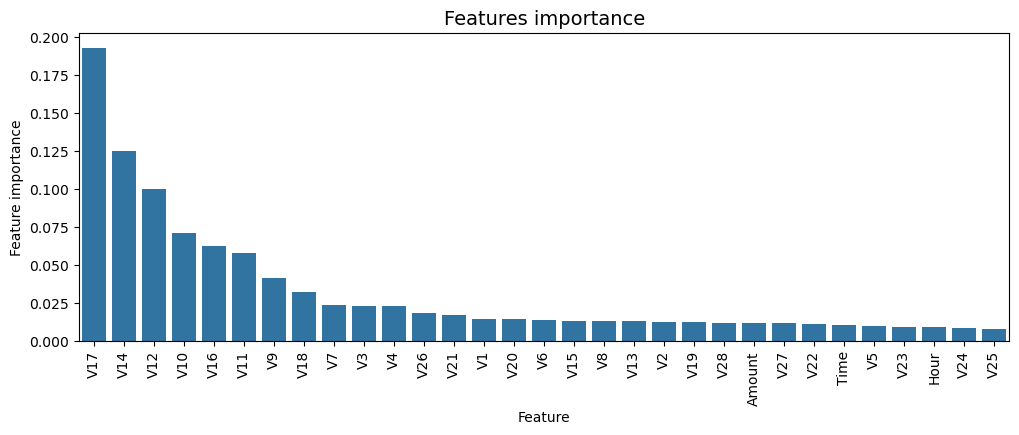

In [316]:
# getting features importance value from the model & storing them into a dataframe
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)

plt.figure(figsize = (12,4))
plt.title('Features importance',fontsize=14)

# plotting a bar plot
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#### Confusion Matrix

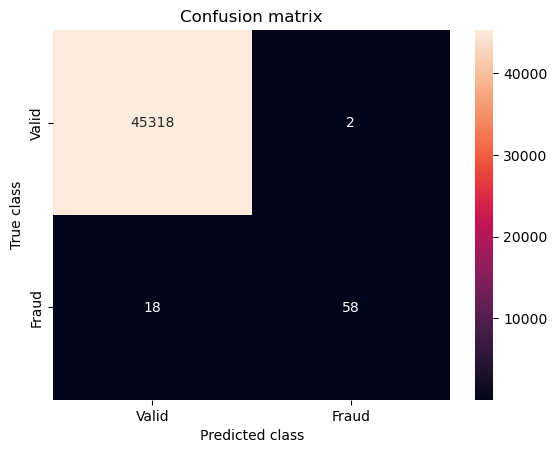

In [319]:
# printing the confusion matrix
Labels = ['Valid', 'Fraud']

cm = confusion_matrix(valid_df[target], preds)

sns.heatmap(cm, xticklabels = Labels,
            yticklabels = Labels, annot = True, fmt ="d")

plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [321]:
# roc auc score
auc_score = roc_auc_score(valid_df[target].values, preds)

f1 = f1_score(valid_df[target].values, preds)

In [323]:
# Create a new row as a DataFrame
new_row_df = pd.DataFrame([{"Model": "Random Forest", "ROC AUC Score": auc_score, "F1 Score": f1}])

# Append using pd.concat()
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

# Print updated DataFrame
results_df

,Model,ROC AUC Score,F1 Score
0,Random Forest,0.881557,0.852941


In [335]:
# Hypertunnig of the model

# # Define features and target from train_df
# X_train = train_df.drop(columns=['Class'])  
# y_train = train_df['Class']  

# X_valid = valid_df.drop(columns=['Class'])  
# y_valid = valid_df['Class']

# # Initialize Random Forest model
# rf = RandomForestClassifier(random_state=2025, class_weight='balanced')

# # Define hyperparameters
# param_dist = {
#     'n_estimators': [100,200,300],  # More trees for better performance
#     'max_depth': [10, 20, 30, None],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4]
# }

# # Stratified K-Fold for imbalanced data
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf, 
#     param_distributions=param_dist, 
#     scoring='roc_auc',  
#     cv=cv_strategy, 
#     n_iter=20,  
#     n_jobs=-1,  
#     verbose=2,  
#     random_state=2025
# )

# # Fit model using train_df
# random_search.fit(X_train, y_train)

# # Print best parameters and AUC score
# print("Best Parameters for Random Forest:", random_search.best_params_)
# print("Best AUC Score:", random_search.best_score_)

<div class='alert alert-info alert-block' align='center'>
    <h3>Ada BoostClassifier</h3>
</div>

In [338]:
# creating an object for the the adaboostclassifier model
clf = AdaBoostClassifier(random_state=2025,
                         algorithm='SAMME',
                         learning_rate=0.8,
                         n_estimators=100)

In [340]:
# training the adaboost model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=2025)

In [342]:
# predicting the validation data
preds = clf.predict(valid_df[predictors])

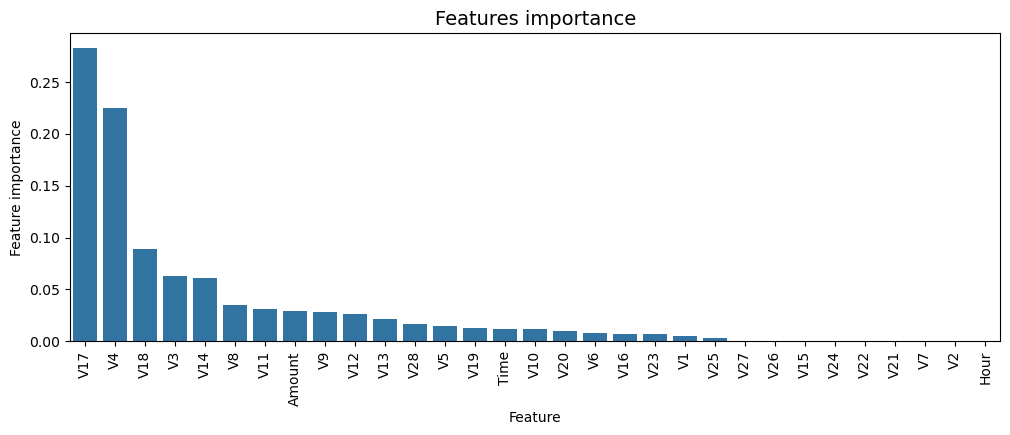

In [343]:
# plotting the feature importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)

plt.figure(figsize = (12,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#### Confusion Matrix

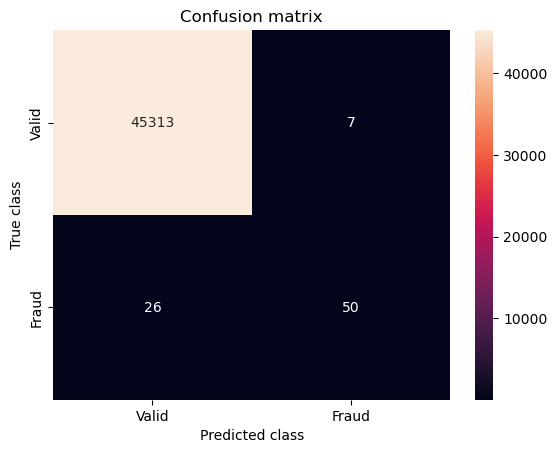

In [349]:
# printing the confusion matrix
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(valid_df[target], preds)

sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### roc auc score

In [352]:
# roc auc socre
auc_score = roc_auc_score(valid_df[target].values, preds)

f1 = f1_score(valid_df[target].values, preds)

In [354]:
# Create a new row as a DataFrame
new_row_df = pd.DataFrame([{"Model": "Ada Boost Classifier", "ROC AUC Score": auc_score, "F1 Score": f1}])

# Append using pd.concat()
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

# Print updated DataFrame
results_df

,Model,ROC AUC Score,F1 Score
0,Random Forest,0.881557,0.852941
1,Ada Boost Classifier,0.828870,0.751880


In [356]:
# Hypertunning of the ada boost model

# # Extract features and target from train_df and valid_df
# X_train = train_df.drop(columns=['Class'])
# y_train = train_df['Class']
# X_valid = valid_df.drop(columns=['Class'])
# y_valid = valid_df['Class']

# # Initialize AdaBoost model
# ada = AdaBoostClassifier(random_state=2025)

# # Define hyperparameters
# param_dist = {
#     'n_estimators': np.arange(50, 500, 50),  # Number of weak learners
#     'learning_rate': np.linspace(0.01, 1.0, 10)  # Learning rate
# }

# # Stratified K-Fold
# cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)

# # Initialize RandomizedSearchCV
# random_search_ada = RandomizedSearchCV(
#     estimator=ada,
#     param_distributions=param_dist,
#     scoring='roc_auc',
#     cv=cv_strategy,
#     n_iter=20,
#     n_jobs=-1,
#     verbose=2,
#     random_state=2025
# )

# # Fit model using train_df
# random_search_ada.fit(X_train, y_train)

# # Print best parameters and AUC score
# print("Best Parameters for AdaBoost:", random_search_ada.best_params_)
# print("Best AUC Score:", random_search_ada.best_score_)

<div class='alert alert-info alert-block' align='center'>
    <h3>XGBoost Classifier</h3>
</div>

In [359]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 2025

In [361]:
params

{'objective': 'binary:logistic',
 'eta': 0.039,
 'silent': True,
 'max_depth': 2,
 'subsample': 0.8,
 'colsample_bytree': 0.9,
 'eval_metric': 'auc',
 'random_state': 2025}

In [365]:
model = xgb.train(params,
                dtrain,
                1000,
                watchlist,
                early_stopping_rounds=50,
                maximize=True,
                verbose_eval=50)

[0]	train-auc:0.91312	valid-auc:0.92030
[50]	train-auc:0.91747	valid-auc:0.93286
[100]	train-auc:0.96344	valid-auc:0.96669
[150]	train-auc:0.98430	valid-auc:0.98831
[200]	train-auc:0.99083	valid-auc:0.99364
[250]	train-auc:0.99393	valid-auc:0.99468
[300]	train-auc:0.99511	valid-auc:0.99553
[350]	train-auc:0.99627	valid-auc:0.99621
[400]	train-auc:0.99706	valid-auc:0.99668
[450]	train-auc:0.99755	valid-auc:0.99712
[500]	train-auc:0.99794	valid-auc:0.99755
[550]	train-auc:0.99834	valid-auc:0.99772
[600]	train-auc:0.99852	valid-auc:0.99770
[610]	train-auc:0.99858	valid-auc:0.99772


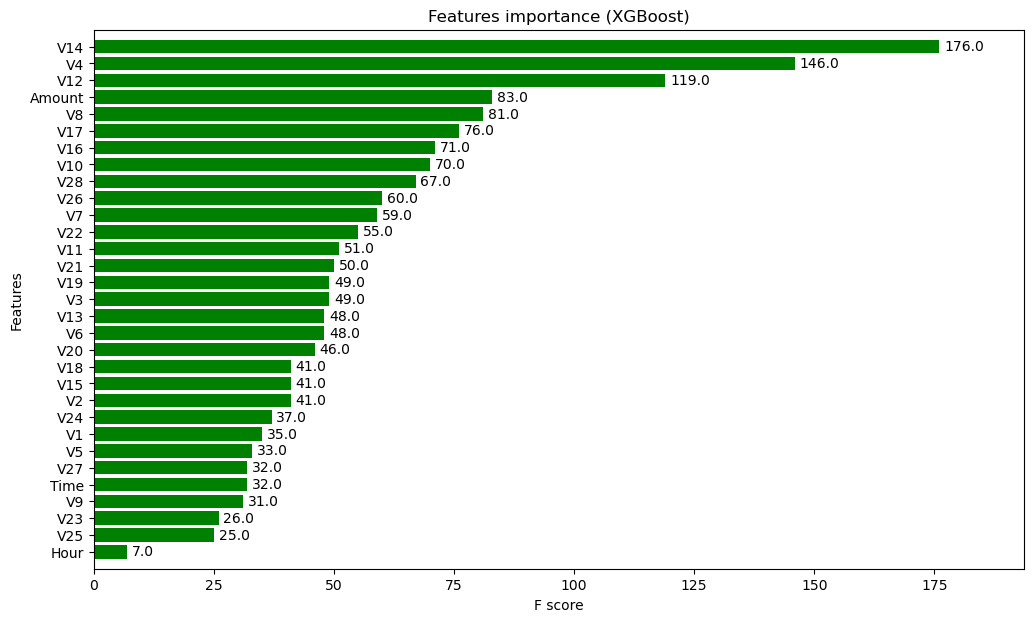

In [367]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,7))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green",grid=False)
plt.show()

In [369]:
preds = model.predict(dtest)

In [371]:
# Convert probabilities to 0 or 1
y_pred = np.where(preds > 0.5, 1, 0)

#### Confusion Matrix

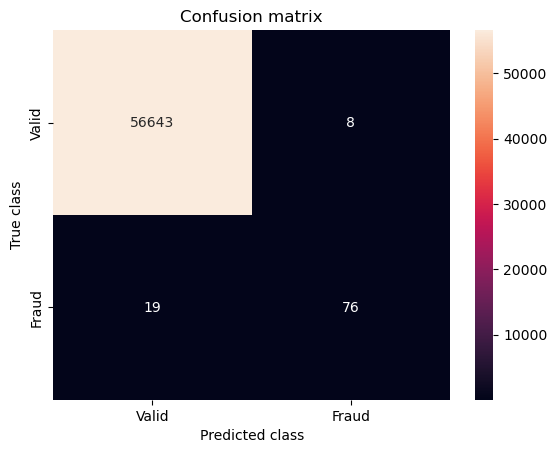

In [374]:
# printing the confusion matrix
Labels = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(test_df[target], y_pred)

sns.heatmap(conf_matrix, xticklabels = Labels,
            yticklabels = Labels, annot = True, fmt ="d")

plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Roc auc score

In [377]:
# roc auc score for the xgboost model
roc_auc_score(test_df[target].values, preds)

f1 = f1_score(test_df[target].values, y_pred)

In [379]:
# Create a new row as a DataFrame
new_row_df = pd.DataFrame([{"Model": "Xgboost Classifier", "ROC AUC Score": auc_score, "F1 Score": f1}])

# Append using pd.concat()
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

# Print updated DataFrame
results_df

,Model,ROC AUC Score,F1 Score
0,Random Forest,0.881557,0.852941
1,Ada Boost Classifier,0.828870,0.751880
2,Xgboost Classifier,0.828870,0.849162


In [381]:
# # hypertunning of the model

# # Initialize XGBoost model
# xgb = XGBClassifier(random_state=2025, scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])

# # Define hyperparameters
# param_dist = {
#     'n_estimators': np.arange(100, 500, 50),
#     'learning_rate': np.linspace(0.01, 0.3, 10),
#     'max_depth': [3, 6, 9, 12],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.3, 0.5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     scoring='roc_auc',
#     cv=cv_strategy,
#     n_iter=20,
#     n_jobs=-1,
#     verbose=2,
#     random_state=2025
# )

# # Fit model
# random_search_xgb.fit(X_train, y_train)

# # Print best parameters and AUC score
# print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
# print("Best AUC Score:", random_search_xgb.best_score_)


<div class='alert alert-info alert-block' align='center'>
    <h3>Lightgbm</h3>
</div>

In [384]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }

In [386]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [388]:
evals_results = {}

callbacks = [
    lgb.early_stopping(stopping_rounds=2 * 50),  # Stops training early if no improvement
    lgb.log_evaluation(period=10),  # Logs progress every 10 rounds
    lgb.record_evaluation(evals_results),  # Stores evaluation metrics
]

In [390]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=1000,
    valid_sets=[dtrain, dvalid],
    valid_names=['train', 'valid'],
    callbacks=callbacks
)

# Check stored evaluation results
print(evals_results)

Training until validation scores don't improve for 100 rounds
[10]	train's auc: 0.986828	valid's auc: 0.920196
[20]	train's auc: 0.987086	valid's auc: 0.924055
[30]	train's auc: 0.987484	valid's auc: 0.926782
[40]	train's auc: 0.991457	valid's auc: 0.926953
[50]	train's auc: 0.992141	valid's auc: 0.91429
[60]	train's auc: 0.992379	valid's auc: 0.914392
[70]	train's auc: 0.991552	valid's auc: 0.90035
[80]	train's auc: 0.99274	valid's auc: 0.901451
[90]	train's auc: 0.99319	valid's auc: 0.902219
[100]	train's auc: 0.995432	valid's auc: 0.905355
Early stopping, best iteration is:
[4]	train's auc: 0.972709	valid's auc: 0.967255
{'train': OrderedDict({'auc': [0.9445970114543285, 0.28437835610991646, 0.9540430897936558, 0.9727088237849179, 0.9812262512812536, 0.9052377032717165, 0.9543895278301538, 0.9773773304494823, 0.9849699337850633, 0.9868275825209868, 0.9777407556672707, 0.9882013157795717, 0.9887601027150923, 0.9889095351130882, 0.9697627807716214, 0.9700998027952644, 0.97996912680262

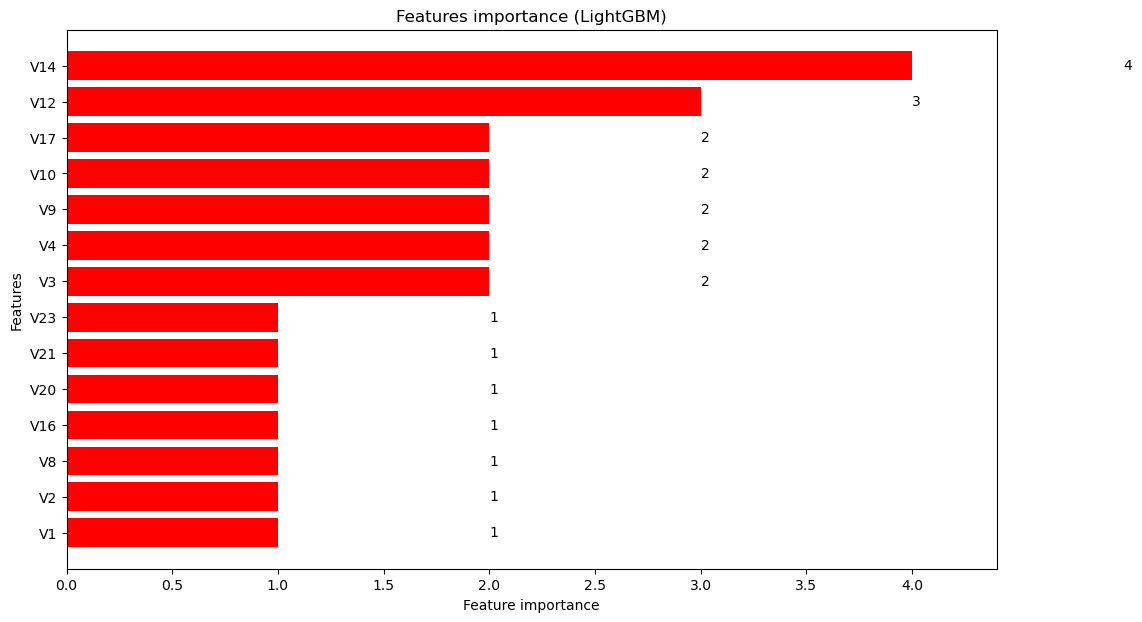

In [392]:
fig, (ax) = plt.subplots(ncols=1, figsize=(12,7))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red",grid=False)
plt.show()

In [394]:
preds = model.predict(test_df[predictors])

# Convert probabilities to 0 or 1
y_pred = np.where(preds > 0.5, 1, 0)

#### Confusion Matrix

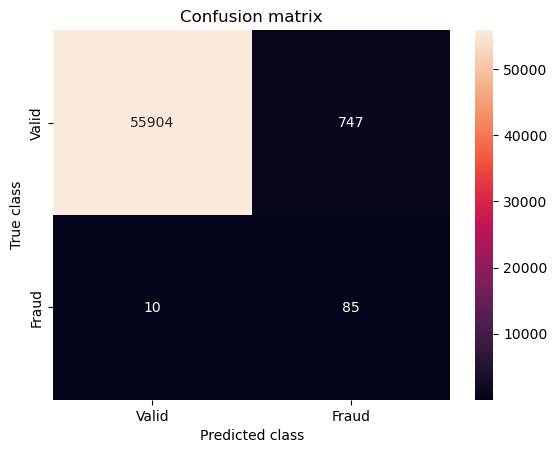

In [397]:
# printing the confusion matrix
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(test_df[target], y_pred)

sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Roc auc score

In [400]:
# roc auc score for the lightbgm model
auc_score = roc_auc_score(test_df[target].values, preds)

f1 = f1_score(test_df[target].values, y_pred)

In [402]:
# Create a new row as a DataFrame
new_row_df = pd.DataFrame([{"Model": "Lightbgm", "ROC AUC Score": auc_score, "F1 Score": f1}])

# Append using pd.concat()
results_df = pd.concat([results_df, new_row_df], ignore_index=True)

# Print updated DataFrame
results_df

,Model,ROC AUC Score,F1 Score
0,Random Forest,0.881557,0.852941
1,Ada Boost Classifier,0.828870,0.751880
2,Xgboost Classifier,0.828870,0.849162
3,Lightbgm,0.953130,0.183387


In [404]:
# # Hypertunning of the model

# # Initialize LightGBM model
# lgbm = LGBMClassifier(random_state=2025, class_weight='balanced')

# # Define hyperparameters
# param_dist = {
#     'n_estimators': np.arange(100, 500, 50),
#     'learning_rate': np.linspace(0.01, 0.3, 10),
#     'num_leaves': [10, 20, 30, 40],
#     'max_depth': [10, 20, 30, None],
#     'min_child_samples': [5, 10, 20],
# }

# # Initialize RandomizedSearchCV
# random_search_lgbm = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_dist,
#     scoring='roc_auc',
#     cv=cv_strategy,
#     n_iter=20,
#     n_jobs=-1,
#     verbose=2,
#     random_state=2025
# )

# # Fit model
# random_search_lgbm.fit(X_train, y_train)

# # Print best parameters and AUC score
# print("Best Parameters for LightGBM:", random_search_lgbm.best_params_)
# print("Best AUC Score:", random_search_lgbm.best_score_)


<div class='alert alert-info alert-block' align='center'>
    <h2>Deep Learning Methods</h2>
</div>

<div class='alert alert-info alert-block' align='center'>
    <h3>ANN Method</h3>
</div>

In [416]:
model = Sequential()

# adding layers to model
model.add(Dense(64,activation='relu',input_shape=(X_train_os.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [420]:
# # Visualize model architecture
# plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [422]:
# compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

In [424]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 0 (0.00 B)

In [426]:
# training the dataf
history = model.fit(X_train_os, y_train_os, epochs=7, batch_size=64, validation_data=(X_test_os, y_test_os))

Epoch 1/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - auc_1: 0.9908 - loss: 0.0914 - val_auc_1: 0.9997 - val_loss: 0.0126
Epoch 2/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - auc_1: 0.9996 - loss: 0.0156 - val_auc_1: 0.9998 - val_loss: 0.0070
Epoch 3/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - auc_1: 0.9997 - loss: 0.0100 - val_auc_1: 0.9998 - val_loss: 0.0054
Epoch 4/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - auc_1: 0.9998 - loss: 0.0073 - val_auc_1: 0.9998 - val_loss: 0.0040
Epoch 5/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - auc_1: 0.9998 - loss: 0.0067 - val_auc_1: 0.9998 - val_loss: 0.0052
Epoch 6/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - auc_1: 0.9998 - loss: 0.0055 - val_auc_1: 0.9998 - val_loss: 0.0034
Epoch 7/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - auc_1: 0.9998 - loss: 0.0054 - val_auc_1: 0.9998 - val_loss: 0.0034


In [432]:
# Define the model
model = Sequential()

# Input Layer with Batch Normalization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_os.shape[1],)))
model.add(BatchNormalization())  # Normalizing activations
model.add(Dropout(0.2))

# Hidden Layer 1
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalizing activations
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Model Summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 192 (768.00 B)

In [434]:
# Train the model with callbacks
history = model.fit(
    X_train_os, y_train_os, epochs=7, batch_size=64, validation_data=(X_test_os, y_test_os),callbacks=[early_stopping, reduce_lr]  )

Epoch 1/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - AUC: 0.9891 - loss: 0.2608 - val_AUC: 0.9996 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 2/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - AUC: 0.9984 - loss: 0.0655 - val_AUC: 0.9996 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 3/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - AUC: 0.9986 - loss: 0.0592 - val_AUC: 0.9997 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 4/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - AUC: 0.9986 - loss: 0.0571 - val_AUC: 0.9996 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 5/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - AUC: 0.9989 - loss: 0.0545 - val_AUC: 0.9993 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 6/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - AUC: 0.9988 - loss: 0.0553 - val_AUC: 0.9997 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 7/7
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - AUC: 0.9987 - loss: 0.0558 - val_AUC: 0.9997 - val_loss: 0.0390 - learning_rate:

<div class='alert alert-info alert-block' align='center'>
    <h3>Conclusion</h3>
</div>


In this study, we built and evaluated multiple machine learning models for **credit card fraud detection**, including **Random Forest, AdaBoost, XGBoost, LightGBM, and an Artificial Neural Network (ANN)**. Our goal was to improve classification performance, considering the highly imbalanced nature of the dataset.  
#
## **1. Model Performance Summary**  
The comparison of models based on **ROC-AUC Score and F1 Score** is as follows:  

| Model                 | ROC AUC Score | F1 Score  |  
|-----------------------|--------------|-----------|  
| **Random Forest**     | **0.8816**    | **0.8529**  |  
| **AdaBoost**          | 0.8289        | 0.7519     |  
| **XGBoost**           | 0.8289        | 0.8492     |  
| **LightGBM**          | **0.9531**    | **0.1834**  |  

- **Random Forest** demonstrated a strong balance between **AUC (0.8816) and F1-score (0.8529)**, making it a reliable choice.  
- **XGBoost** performed similarly, with an **AUC of 0.8289** and an F1-score of **0.8492**.  
- **LightGBM achieved the highest AUC (0.9531)**, indicating strong classification power, but its **low F1-score (0.1834)** suggests it struggles with handling class imbalance effectively.  
- **AdaBoost** performed moderately well but was outperformed by Random Forest a#nd XGBoost.  

## **2. ANN Model Performance**  
The ANN model was trained using **Batch Normalization, L2 Regularization, and Callbacks (EarlyStopping & ReduceLROnPlateau)** to enhance stability and generalization. The training process yielded:  

- **AUC on validation data: 0.9997**  
- **Final loss: 0.0390**  
- The model successfully learned the fraud patterns and generalized well across epochs, with **low validation loss and high AUC**.  
- Regularization helped prevent overfitting, while batch normalization s#tabilized training.  

## **3. Best Model Selection**  
Considering both **AUC and F1-score**, the **Random Forest model** is the most balanced and effective choice for fraud detection in this dataset. However, if AUC is prioritized over precision-recall balance, **LightGBM** could be considered.  

For a deep learning approach, the **ANN model performed exceptionally well with AUC of 0.9997**, indicating strong potential for real-world fraud detection, provided computational resources a#llow for its deployment.  

## **4. Future Improvements**  
To further improve performance:  
✅ **Ensemble models** (e.g., combining Random Forest, XGBoost, and ANN) could enhance prediction accuracy.  
✅ **Hyperparameter tuning** for LightGBM may improve its F1-score.  
✅ **Feature engineering techniques** could extract more meaningful patterns from transaction data.  

---
Overall, the **Random Forest model is recommended** for deployment, while **ANN shows great potential for large-scale applications with sufficient resources**. 🚀
on of 0.93.

<div class='alert alert-info alert-block' align='center'><h3>References</h3></div>

- RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve
- AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html
- LightGBM Python implementation, https://lightgbm.readthedocs.io/en/latest/Python-Intro.html